<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-des-performances-sur-les-données-de-Auto-Data-Set" data-toc-modified-id="Analyse-des-performances-sur-les-données-de-Auto-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse des performances sur les données de <em>Auto Data Set</em></a></span><ul class="toc-item"><li><span><a href="#Utilisation-d'un-ensemble-de-validation---Train/test-split" data-toc-modified-id="Utilisation-d'un-ensemble-de-validation---Train/test-split-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Utilisation d'un ensemble de validation - Train/test split</a></span></li><li><span><a href="#Utilisation-de-la-validation-croisée" data-toc-modified-id="Utilisation-de-la-validation-croisée-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Utilisation de la validation croisée</a></span></li></ul></li><li><span><a href="#Utilisation-du-bootstrap-sur-les-données-Porfolio" data-toc-modified-id="Utilisation-du-bootstrap-sur-les-données-Porfolio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Utilisation du bootstrap sur les données <em>Porfolio</em></a></span></li><li><span><a href="#Estimation-des-performances-d'un-modèle-de-régression-linéaire" data-toc-modified-id="Estimation-des-performances-d'un-modèle-de-régression-linéaire-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estimation des performances d'un modèle de régression linéaire</a></span></li><li><span><a href="#Exercices-supplémentaires-[optionnels!]---Validation-sur-la-base-Default" data-toc-modified-id="Exercices-supplémentaires-[optionnels!]---Validation-sur-la-base-Default-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercices supplémentaires [optionnels!] - Validation sur la base <code>Default</code></a></span><ul class="toc-item"><li><span><a href="#Modèle" data-toc-modified-id="Modèle-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Modèle</a></span></li><li><span><a href="#Erreur-de-prédiction-par-validation." data-toc-modified-id="Erreur-de-prédiction-par-validation.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Erreur de prédiction par validation.</a></span></li><li><span><a href="#Recommencer" data-toc-modified-id="Recommencer-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Recommencer</a></span></li><li><span><a href="#Pertinence-d'une-nouvelle-variable----Validation" data-toc-modified-id="Pertinence-d'une-nouvelle-variable----Validation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Pertinence d'une nouvelle variable -- Validation</a></span></li><li><span><a href="#Pertinence-d'une-nouvelle-variable----Validation-croisée" data-toc-modified-id="Pertinence-d'une-nouvelle-variable----Validation-croisée-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Pertinence d'une nouvelle variable -- Validation croisée</a></span></li><li><span><a href="#Estimées-des-erreurs-standard-par-Bootstrap" data-toc-modified-id="Estimées-des-erreurs-standard-par-Bootstrap-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Estimées des erreurs standard par Bootstrap</a></span><ul class="toc-item"><li><span><a href="#Direct" data-toc-modified-id="Direct-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Direct</a></span></li><li><span><a href="#Par-bootstrap" data-toc-modified-id="Par-bootstrap-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>Par bootstrap</a></span></li></ul></li></ul></li></ul></div>

Les exercices proposés dans cette séance de travaux pratiques sont adaptés de notre [livre de référence](http://www-bcf.usc.edu/~gareth/ISL/), chapitre 5, pp. 190-197 ainsi que des exercices plus avancés pp 199-201. 

Avant de vous lancer, vous installerez las packages utiles en lançant, sous R:
```r
install.packages("ISLR")
install.packages("boot")
```

In [32]:
install.packages("ISLR")
install.packages("boot")

Installing package into ‘/home/bercherj/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/bercherj/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



# Analyse des performances sur les données de *Auto Data Set*

On utilisera à nouveau les données `Auto`. Vous obtiendrez la description des variables par `?Auto`. 

## Utilisation d'un ensemble de validation - Train/test split

Vous explorerez l'utilisation d'un ensemble de validation pour estimer l'erreur de prédiction pour différents modèles de régression ajustés sur les données `Auto`. 

1) Pour commencer, il faut donc définir un ensemble d'apprentissage et un ensemble de validation. Vous utiliserez pour ce faire la fonction `sample`. 

- Charger le module ISLR
- Choisir un seed pour le générateur aléatoire
- Sélectionner aléatoirement 50% des indices de `Auto` afin de former l'ensemble d'apprentissage ; vous noterez par exemple train ces indices


In [33]:
library(ISLR)
set.seed(12)
train = sample(nrow(Auto), size = nrow(Auto)/2)
Train = Auto[train, ]  #On peut définir directement les deux ensembles, ou se servir d'un subset dans la suite
Test = Auto[-train, ]

2) Vous effectuerez ensuite une régression de `mpg` sur `horsepower`, en envisageant des régressions polynomiales, pour des degrés allant de 1 à 4. Fonction `lm`

- pour chacun des degrés de polynôme, 
  - effectuer une régression avec le dataset Auto, **sur l'ensemble d'apprentissage** sélectionné question 1)
  - tester les performances **sur la base de test** en calculant la moyenne de l'écart quadratique entre `mpg` et la valeur prédite. Fonction `predict`
- tracer le résultat et/ou imprimer les performances obtenues
- Effectuer l'ensemble de la procédure pour différentes valeurs de seed, c'est-à-dire différents splits training/validation
- Quel degré faudrait-il adopter au vu de ces résultats, que penser de la stabilité des différentes estimées de l'erreur de prédiction ?

Voici d'abord une solution "brute-force"

In [34]:
library(ISLR)
set.seed(1)
train=sample(392,196)

lm.fit=lm(mpg~horsepower,data=Auto,subset=train)
attach(Auto)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

lm.fit2=lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

set.seed(2)
train=sample(392,196)
lm.fit=lm(mpg~horsepower,data=Auto,subset=train)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

lm.fit2=lm(mpg~poly(horsepower,2),data=Auto,subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

lm.fit3=lm(mpg~poly(horsepower,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 23.26601

[1] 18.71646

[1] 18.79401

[1] 25.72651

[1] 20.43036

[1] 20.38533

On évite de répéter les opérations sur les différents degrés

In [35]:
perf = c()
# Pour une expérience donnée, boucle sur les degrés
for (degree in 1:5) {
    lm.fit = lm(mpg ~ poly(horsepower, degree), data = Auto, subset = train)
    perf[degree] = mean((Auto$mpg - predict(lm.fit, Auto))[-train]^2)
}
perf

[1] 25.72651 20.43036 20.38533 20.30902 19.79689

On évite de répéteraussi sur les seeds

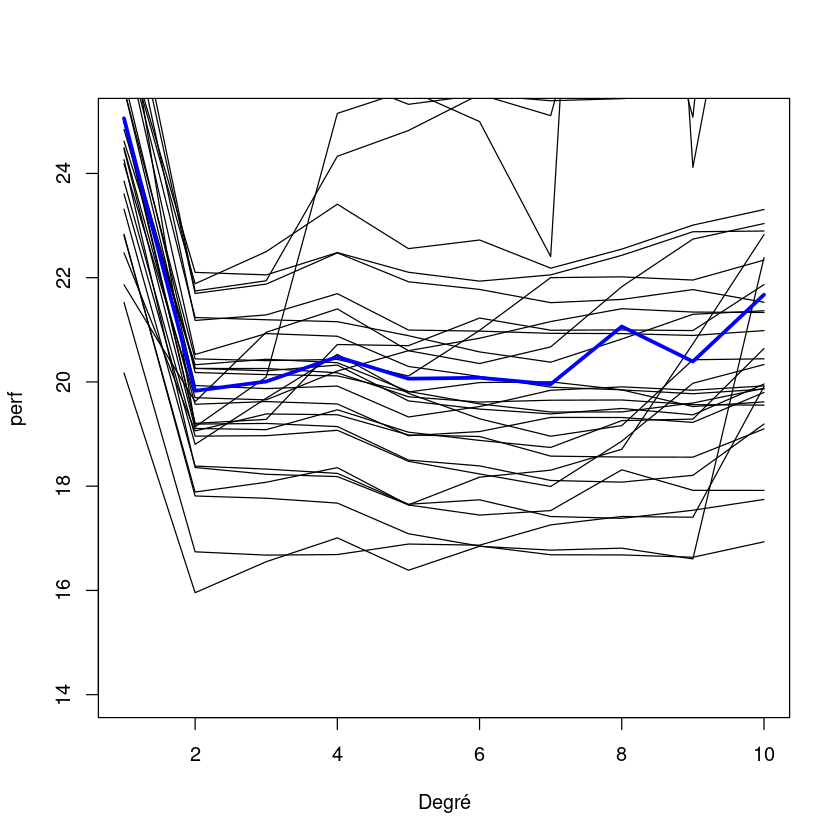

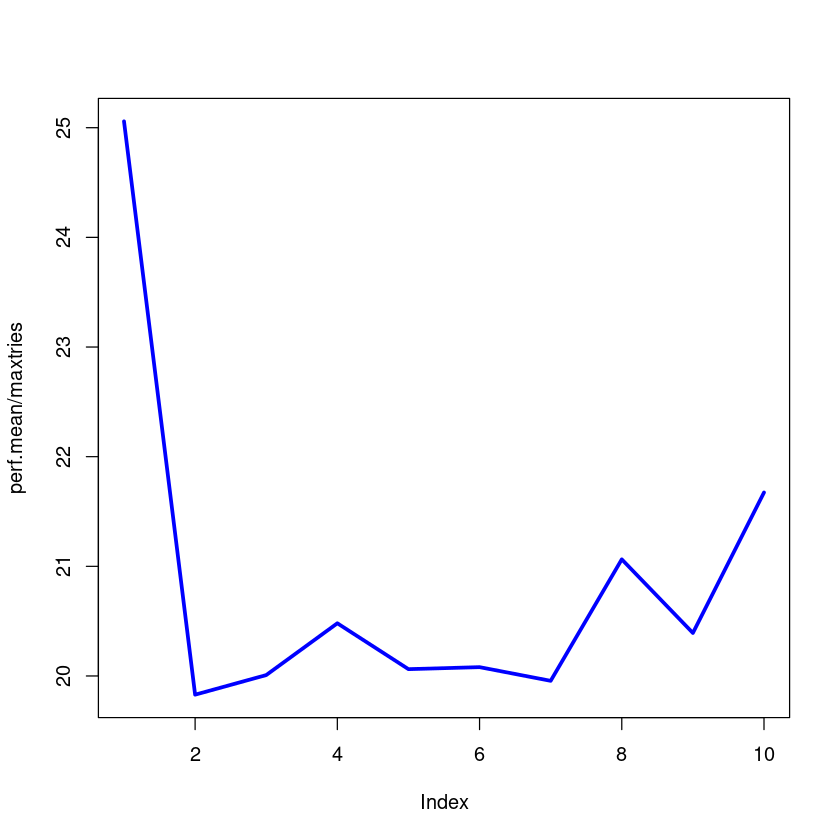

In [36]:
# On boucle en plus sur différents splits training/validation
maxtries = 30
perf.mean = c(rep(0, 10))
for (exp in 1:maxtries) {
    train = sample(nrow(Auto), size = nrow(Auto)/2)
    perf = c()
    for (degree in 1:10) {
        lm.fit = lm(mpg ~ poly(horsepower, degree), data = Auto, subset = train)
        perf[degree] = mean((Auto$mpg - predict(lm.fit, Auto))[-train]^2)
        perf.mean[degree] = perf.mean[degree] + perf[degree]
        # print(paste('perf', perf[degree], 'mean', perf.mean[degree]))
    }
    perf
    if (exp == 1) 
        plot(perf, ylim = c(14, 25), xlab = "Degré", type = "l") else lines(perf, type = "l")
}
lines(perf.mean/maxtries, type = "l", lwd = 3, col = "blue")
plot(perf.mean/maxtries, type = "l", lwd = 3, col = "blue")

Pas si simple de choisir le degré "optimal" lorque qu'on teste dfférents couples training/validation. le handicap est ici le faible nombre de données qui donne une très grande variabilité. Ce qui est net c'est que passer à un degré 2 donne une nette amélioration ; après c'est très variable suivant les différents assais. Dans ces conditions, on aura tendance à être très conservateur et à privilégier les ordres les plus faibles (donc le moins de variance). 

## Utilisation de la validation croisée

La librairie `boot` contient à la fois des fonctions pour effectuer du bootstrap et des fonctions pour la validation croisée. Elle contient également une fonction `glm` qui permet, entre autres, d'effectuer des régressions linéaires, tout comme `lm`. 

1) Vérifier que l'on peut effectivement remplacer `lm` par `glm` en comparant les resultats des régressions `mpg~horsepower` (charger `boot` au préalable) 

In [37]:
library(boot)
glm.fit = glm(mpg ~ horsepower, data = Auto)
coef(glm.fit)
# vs
lm.fit = lm(mpg ~ horsepower, data = Auto)
coef(lm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

(Intercept)  horsepower 
 39.9358610  -0.1578447

2) Consulter l'aide de `cv.glm`

3) Effectuer une estimation de l'erreur par validation croisée en utilisant cette fonction. Regarder la valeur de l'attribut delta et comprendre quels sont les résultats fournis. Quel est, qualitativement, l'effet du choix de K sur les résultats et le temps d'exécution (et quelle est la valeur par défaut) ? 

In [3]:
?cv.glm

In [38]:
library(boot)
glm.fit = glm(mpg ~ horsepower, data = Auto)
cv.err = cv.glm(Auto, glm.fit, K = 100)
cv.err$delta

Warning message in cv.glm(Auto, glm.fit, K = 100):
“'K' has been set to 98.000000”


[1] 24.22986 24.22838

Deux variables sont retournées: l'estimée brute de l'erreur de prédiction, et une estimée corrigée du biais introduit par la diminution du nobre de points sur l'apprentissage. Plus K est grand, plus le temps d'exécution est important !

4) Pour différentes valeurs de seed et des degrés compris entre 1 et 12, effectuer une régression de `mpg~poly (horsepower, x)` et évaluer l'erreur de prédiction via une validation croisée avec K=10. Comment se compare cette approche avec l'approche précédente. Quel degré choisiriez vous ?

[1] 24.29016 19.29910 19.35967 19.64088 18.81111 18.70058 19.02822 19.25888
 [9] 19.01266 19.10223 19.33815 19.91419

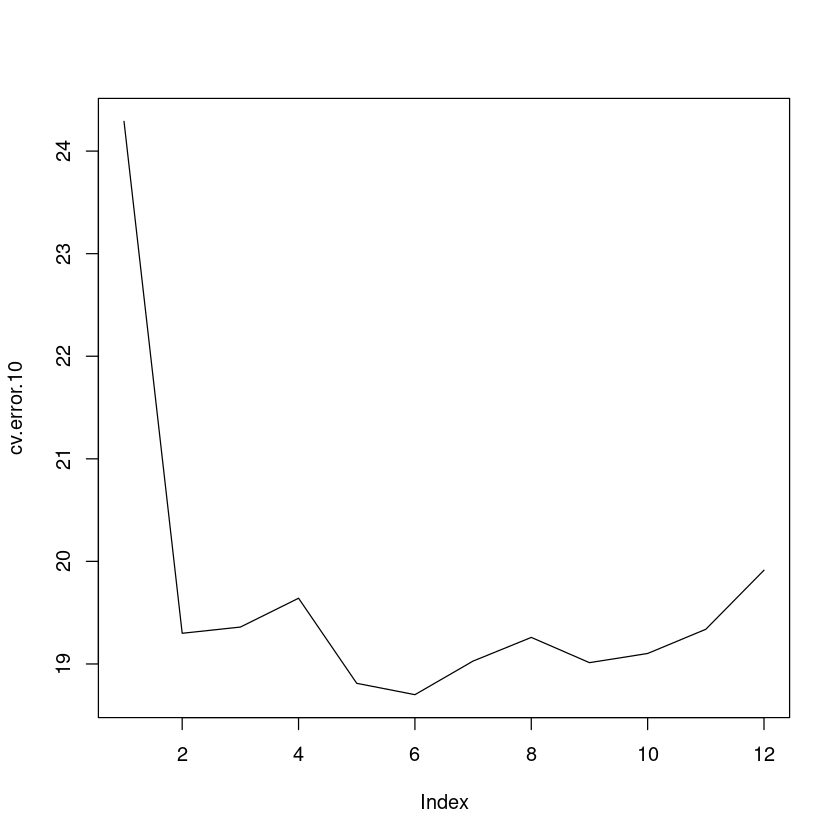

In [39]:
set.seed(44)
cv.error.10 = rep(0, 12)
for (i in 1:12) {
    glm.fit = glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error.10[i] = cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
cv.error.10
plot(cv.error.10, type = "l")

Par validation croisée, les résultats sont bien plus stables ; tout simplement parce qu'on met plus de points dans l'apprentissage et le modèle est donc mieux estimé. Il semble qu'un ordre de 6 soit correct. Peut-être faudrait-il cependant se limiter à 2 et ne pas risquer d'overfitting car le gain est bien faible. 

5) Pour les étudiants les plus avancés dans le TP, charger la librairie `parallel`. Celle-ci permet d'effectuer les calculs, notamment de CV, sur plusieur coeurs. Il faut utiliser la fonction `mclapply`, équivalent à une `lapply` qui appliquerait la même fonction sur plusieurs coeurs. Utiliser cette fonction pour paralléliser le calcul du CV

In [40]:
library(parallel)  ##
set.seed(17)
cv.error.10 = unlist(mclapply(1:10, function(i) {
    glm.fit = glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.glm(Auto, glm.fit)$delta[1]
}, mc.cores = 12))

# Utilisation du bootstrap sur les données *Porfolio*

Un des grands avantages du bootstrap est qu'il peut-être appliqué dans à peu près n'importe quelle situation. En R, utiliser le bootstrap se fait en deux étapes : 

- Créer une fonction qui calcule la statistique d'intérêt, 
- Utiliser la fonction `boot()`, contenue dans la librairie de même nom, pour calculer la statistique bootsrap en répétant le cacul de cette statistique sur des échantillons bootstrap obtenus par rééchantillonage avec remplacement des données initiales. 

Nous allons réutiliser l'exemple vu en cours sur des données qu'on imagine être des données d'investissement, $X$ et $Y$. On cherche le meilleur paramètre de mélange entre ces deux populations de manière à minimiser la variance de l'ensemble 
$$
\mathrm{Var}\left[{\alpha X+(1-\alpha Y)}\right]
$$
La solution analytique est donnée par
$$
\alpha = \frac{\sigma_Y^2-\sigma_{XY} }{\sigma_X^2 + \sigma_Y^2-2\sigma_{XY}}.
$$
En pratique, la valeur sera estimée en $\hat{\alpha}$ en remplaçant les différentes variances et covariances par leurs estimées. Les données sont disponibles dans le dataframe Portfolio. 

1. Consultez l'aide par `?Portfolio`.  
2. Écrire une fonction `alpha.fn(data, index)` qui reçoit les données et un vecteur des indices à utiliser. La fonction doit retourner une estimée de $\alpha$. Fonctions utiles: `var`, `cov`. 
3. Consulter l'aide de `boot`, puis utiliser la fonction afin de calculer l'estimée bootstrap à partir de 1000 échantillons bootsrap. Tracer l'histogramme des résultats ; donner l'intervalle de confiance à 95% correspondant. 

In [7]:
?Portfolio

In [8]:
alpha.fn = function(data, index = 1:100) {
    X = data$X[index]
    Y = data$Y[index]
    return((var(Y) - cov(X, Y))/(var(X) + var(Y) - 2 * cov(X, Y)))
}
# using all 100 observations to get alpha:
alpha.fn(Portfolio, 1:100)

ERROR: Error in alpha.fn(Portfolio, 1:100): object 'Portfolio' not found


In [9]:
# or we can sample bootstrap style (ie with replacement)
set.seed(1)
alpha.fn(Portfolio, sample(100, 100, replace = T))

ERROR: Error in alpha.fn(Portfolio, sample(100, 100, replace = T)): object 'Portfolio' not found


In [10]:
?boot

In [11]:
# and we can use the boot function to automate this thousands of times
boot.out = boot(Portfolio, alpha.fn, R = 1000)
boot.out

ERROR: Error in NROW(data): object 'Portfolio' not found


In [ ]:
plot(boot.out)

# Estimation des performances d'un modèle de régression linéaire

Comme on l'a vu en cours, il est possible d'utiliser le bootstrap afin de quantifier la qualité des estimées et prédictions des méthodes d'appprentissage statistique. Cela s'applique par exemple à la régression linéaire toute simple. On va considérer la régression habituelle  `mpg~horsepower` pour le dataset `Auto`, pour des degrés 1 et 2, et comparer les performances affichées à l'aide des formules explicites (connues dans ce cas simple), et l'évaluation numérique donnée par le bootstrap. 

1. Créer une fonction `boot.fn()` qui prenne en entrée les données et un vecteur d'index et retourne les coefficients de la régression linéaire correspondante. 
2. Utiliser la fonction `sample` pour rééchantillonner les données et calculer les estimées correspondantes par `boot.fn`. Réitérer avec une autre valeur de seed. Comparer ces résultats. 
3. Utiliser mainetant la fonction `boot` pour calculer un millier de ces estimées. Afficher les résultats. 
4. Comparer ces résultats à ceux qu'on relève sur le résumé `summary` de la fonction `lm`. 

In [65]:
boot.fn = function(data, ind) {
    l = lm(mpg ~ horsepower+I(horsepower^2), data = data, subset = ind)
    return(coef(l))
}

# simply compute coefficient estimates
boot.fn(Auto, 1:392)

(Intercept)      horsepower I(horsepower^2) 
   56.900099702    -0.466189630     0.001230536

Une version un peu plus générale

In [13]:
# boot.fn=function(data,formula,ind){ l=lm(formula,data=data[ind,])
# return(coef(l)) }

## simply compute coefficient estimates boot.fn(Auto,'mpg~horsepower', 1:392)

In [66]:
set.seed(1)

# one bootstrap round
boot.fn(Auto, sample(392, 392, replace = T))

# another one
boot.fn(Auto, sample(392, 392, replace = T))

(Intercept)      horsepower I(horsepower^2) 
   57.474669648    -0.479632716     0.001284905

(Intercept)      horsepower I(horsepower^2) 
   58.611102414    -0.496710138     0.001352032

In [67]:
# now do a thousand!
b = boot(Auto, boot.fn, 1000)
b


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias    std. error
t1* 56.900099702  3.417701e-02  2.03401058
t2* -0.466189630 -6.844099e-04  0.03248461
t3*  0.001230536  2.724701e-06  0.00011740

In [68]:
# however in the simple case of linear regression, we can also get these
# estimates with the summary() function from the fit itself as was described in
# section 3.1.2
summary(lm(mpg ~ horsepower + I(horsepower^2), data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21


Enfin, effectuer les mêmes opérations pour une régression polynomiale de degré 2. Que pensez-vous de la qualité des estimées bootstrap ?

In [46]:
boot.fn = function(data, index) {
    coefficients(lm(mpg ~ horsepower + I(horsepower^2), data = data, subset = index))
}

set.seed(1)
boot(Auto, boot.fn, 1000)
summary(lm(mpg ~ horsepower + I(horsepower^2), data = Auto))$coef


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  3.511640e-02 2.0300222526
t2* -0.466189630 -7.080834e-04 0.0324241984
t3*  0.001230536  2.840324e-06 0.0001172164

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21


# Exercices supplémentaires [optionnels!] - Validation sur la base `Default`


Dans le TP sur la discrimination, on a utilisé la base `Default` avec une régression logistique. On va maintenant estimer l'erreur de prédiction en utilisant un ensemble de validation, puis on testera l'importance des variables dans le modèle. Enfin, on estimera les statistiques sur les coefficients par bootstrap. 

## Modèle 
Charger ISLR, choisir un seed, et apprendre un modèle de régression logistique pour `default~income+balance`. Afficher les résultats.  

In [47]:
library(ISLR)
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


## Erreur de prédiction par validation. 

Estimez l'erreur de prédiction pour ce modèle. Pour cela :

1. Séparer les données en un ensemble d'apprentissage et un ensemble de validation (train=3/4 des données, test=le 1/4 restant)
2. Apprendre le modèle
3. Calculer les prédictions sur la base de test, et le taux d'erreur en seuillant la probabilité a posteriori à 0.5

In [49]:
set.seed(1)
train = sample(nrow(Default), 3 * nrow(Default)/4)  #1.
Default.train = Default[train, ]
Default.test = Default[-train, ]

glm.fit = glm(default ~ income + balance, data = Default.train, family = "binomial")  #2.
glm.probs = predict(glm.fit, Default.test, type = "response")  #3.
glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
mean(glm.pred != Default.test$default)  #4.

[1] 0.026

## Recommencer

Répéter le processus précédent un certain nombre de fois, en utililisant différentes segmentations des données. Commenter. 

In [50]:
for (seed in c(15, 5, 34)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    print(mean(glm.pred != Default.test$default))
}

[1] 0.0264
[1] 0.022
[1] 0.0284


Ci-dessous une boucle sur 300 essais. Cela commence à devenir long. 

In [51]:
z = c()
k = 0
for (seed in seq(300)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    z[k] = mean(glm.pred != Default.test$default)
    k = k + 1
}

In [52]:
mean(z)

[1] 0.02635318

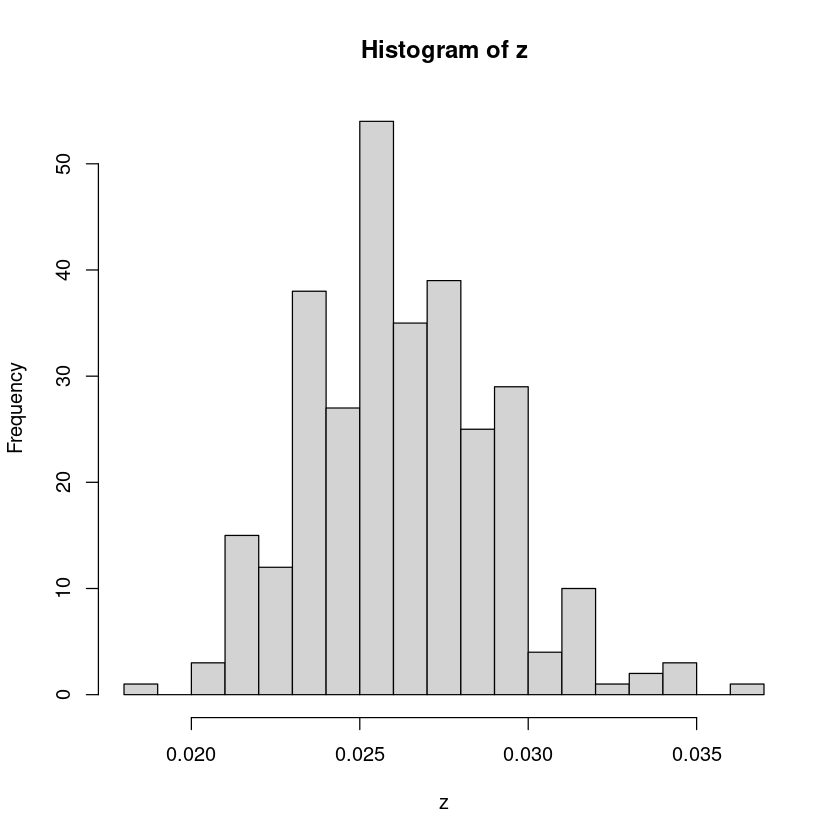

In [53]:
hist(z,20)

## Pertinence d'une nouvelle variable -- Validation

Considérons maintenant un modèle qui prédit la probabilité de défaut à partir de  income, balance, et d'une variable catégorielle sur student. Estimer le taux d'erreur sur un ensemble validation, pour plusieurs ensembles. Commenter sur l'utilité d'inclure ou non la variable student ?

In [54]:
for (seed in c(15, 5, 34, 77, 79, 91, 92, 93, 789)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance + student, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    print(mean(glm.pred != Default.test$default))
}

[1] 0.026
[1] 0.0228
[1] 0.0288
[1] 0.0248
[1] 0.0316
[1] 0.0308
[1] 0.0272
[1] 0.0288
[1] 0.028


In [55]:
zz = c()
k = 0
for (seed in seq(300)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance + student, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    zz[k] = mean(glm.pred != Default.test$default)
    k = k + 1
}

In [56]:
mean(zz)
sd(zz)

[1] 0.02674649

[1] 0.00277773

Il ne semble pas qu'ajouter cette variable soit complètement pertinent car le taux d'erreur moyen est un peu supérieur... Mais cet effet reste faible, et à l'intérieur de l'intervalle de confiance. 

## Pertinence d'une nouvelle variable -- Validation croisée

Effectuer la même étude que précédemment, mais en évaluant les performances par validation croisée. Que concluerait-on cette fois ? Comment expliquer les différences éventuelles entre les performances ?

In [57]:
cv.error.10 = c()
for (i in 1:10) {
    glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
    cv.error.10[i] = cv.glm(Default, glm.fit, K = 10)$delta[1]
}
cv.error.10
# mean(cv.error.10) sd(cv.error.10) plot(cv.error.10,type='l')

[1] 0.02147700 0.02149027 0.02143621 0.02146211 0.02148833 0.02149398
 [7] 0.02145036 0.02149352 0.02143688 0.02144656

In [58]:
cv.error.10=c()
for (i in 1:1) {
    glm.fit = glm (default~income+balance+student,data=Default, family="binomial") 
    cv.error.10[i]= cv.glm (Default, glm.fit, K =10)$delta[1]
}
cv.error.10
#mean(cv.error.10)
#sd(cv.error.10)
#plot(cv.error.10,type='l')

[1] 0.02137219

Cette fois-ci, il semble que l'on devrait garder Student ; mais encore une fois la différence est extrèmement faible. Les différences de performances entre l'approche validation et la validation croisée viennent du fait que dans la validation croisée, on utilise un apprentissage sur plus de données. Donc un modèle mieux appris.

## Estimées des erreurs standard par Bootstrap

On poursuit avec la régression logistique et les données `Default`. On va maintennat comparer les erreurs standard sur le coefficients soit calculées analytiquement (et lues sur la sortie de `glm`), soit en utilisant un bootstrap. 

### Direct
En utilisant `summary()` et `glm()`, déterminez les erreurs standards sur les coefficients associées à `income` `balance` dans une régression logistique. 

In [59]:
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


### Par bootstrap

1.  Écrire une fonction `boot.fn()` qui reçoit `Default` ainsi qu'un index des observations et rend les estimées des coefficients pour  income et balance.
2. Utiliser `boot()` et  `boot.fn()` pour calculer les erreurs standard. Comparer avec les résultats précédents et commenter..


In [60]:
boot.fn = function(data, index) {
    coefficients(glm(default ~ income + balance, data = data, subset = index, family = "binomial"))
}

boot.fn(Default, 1:nrow(Default))

(Intercept)        income       balance 
-1.154047e+01  2.080898e-05  5.647103e-03

In [61]:
library(boot)
boot(Default, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -3.945460e-02 4.344722e-01
t2*  2.080898e-05  1.680317e-07 4.866284e-06
t3*  5.647103e-03  1.855765e-05 2.298949e-04

In [31]:
?boot

```r
## 
## ORDINARY NONPARAMETRIC BOOTSTRAP
## 
## 
## Call:
## boot(data = Default, statistic = boot.fn, R = 1000)
## 
## 
## Bootstrap Statistics :
##       original     bias    std. error
## t1* -1.154e+01 -8.008e-03   4.239e-01
## t2*  2.081e-05  5.871e-08   4.583e-06
## t3*  5.647e-03  2.300e-06   2.268e-04
```

Les estimées bootstrap sont très proches des valeurs fournies par `summary`. C'est bon signe !